In [ ]:
import pickle
import numpy as np

In [ ]:
pickle_in=open('/content/drive/My Drive/CLASS Project/balanced_image_data.pickle','rb')
dataset=pickle.load(pickle_in)
pickle_in.close()
dataset=np.array(dataset)
print(dataset.shape)
dataset=dataset/255.0
dataset=np.repeat(dataset,3,-1)
print(dataset.shape)

(10342, 100, 100)
(10342, 100, 300)


In [ ]:
dataset=dataset.reshape((10342,100,100,3))
print(dataset.shape)


(10342, 100, 100, 3)


In [ ]:
pickle_in=open('/content/drive/My Drive/CLASS Project/balanced_label.pickle','rb')
label=pickle.load(pickle_in)
pickle_in.close()
label=np.array(label)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE=[100,100]
res=ResNet50(input_shape=IMG_SIZE+[3],weights='imagenet',include_top=False)

for layer in res.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(res.output)
prediction=Dense(3,activation='softmax')(x)
model = Model(inputs=res.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

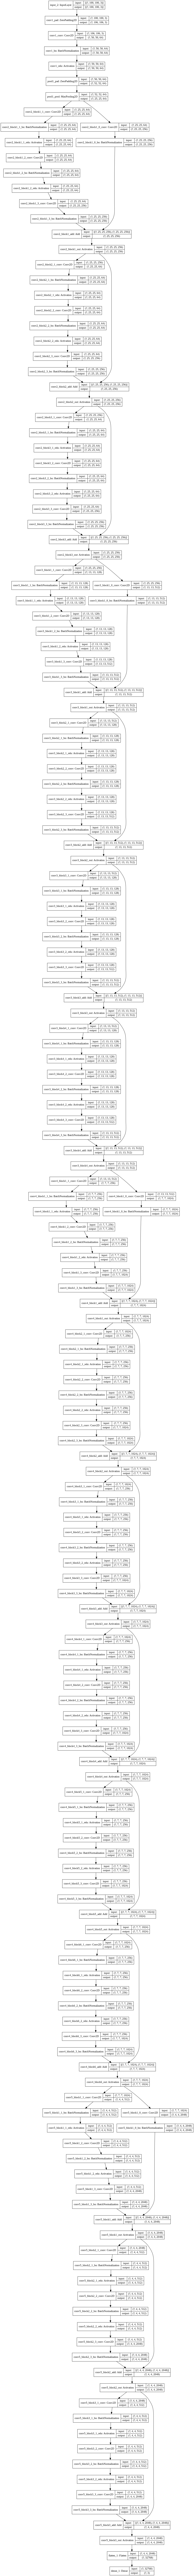

In [ ]:
keras.utils.plot_model(model,to_file='/content/drive/My Drive/CLASS Project/resnet50.png',show_shapes=True)

In [ ]:
print(type(dataset))

<class 'numpy.ndarray'>


In [ ]:
print(type(dataset))
print(type(label))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,label,stratify=label,test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


(9307, 100, 100, 3)
(1035, 100, 100, 3)
(9307,)
(1035,)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9307, 100, 100, 3)
(1035, 100, 100, 3)
(9307, 3)
(1035, 3)


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)

In [ ]:
hist=model.fit(X_train,y_train,epochs=20,validation_split=0.1,verbose=1)

Epoch 1/20
262/262 [==============================] - 10s 37ms/step - loss: 72.1658 - accuracy: 0.5949 - val_loss: 36.3245 - val_accuracy: 0.6617
Epoch 2/20
262/262 [==============================] - 9s 34ms/step - loss: 67.0871 - accuracy: 0.6517 - val_loss: 152.8349 - val_accuracy: 0.6380
Epoch 3/20
262/262 [==============================] - 9s 35ms/step - loss: 54.7984 - accuracy: 0.6437 - val_loss: 58.8386 - val_accuracy: 0.6380
Epoch 4/20
262/262 [==============================] - 9s 35ms/step - loss: 61.2559 - accuracy: 0.6414 - val_loss: 42.2352 - val_accuracy: 0.6337
Epoch 5/20
262/262 [==============================] - 9s 34ms/step - loss: 59.2463 - accuracy: 0.6664 - val_loss: 47.5459 - val_accuracy: 0.6971
Epoch 6/20
262/262 [==============================] - 9s 34ms/step - loss: 66.9540 - accuracy: 0.6502 - val_loss: 106.4038 - val_accuracy: 0.6337
Epoch 7/20
262/262 [==============================] - 9s 34ms/step - loss: 64.8639 - accuracy: 0.6576 - val_loss: 16.8014 - val

In [ ]:
model.evaluate(X_test,y_test)

33/33 [==============================] - 1s 30ms/step - loss: 81.7220 - accuracy: 0.6725


[81.72201538085938, 0.6724637746810913]

In [ ]:
a=X_test[0]
print(a.shape)
a=np.expand_dims(a,0)

(100, 100, 3)


In [ ]:
print(np.argmax(model.predict(a))+1)

2


In [ ]:
y_test[0]

array([0., 1., 0.], dtype=float32)

In [ ]:
model.save('/content/drive/My Drive/CLASS Project/resnet50.h5')

In [ ]:
a=keras.models.load_model('/content/drive/My Drive/CLASS Project/resnet50.h5')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

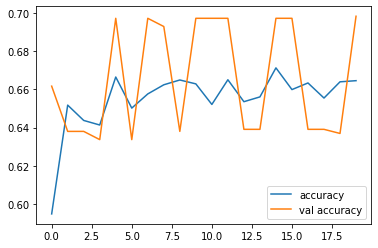

In [ ]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val accuracy')
plt.legend()

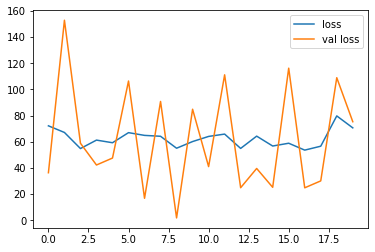

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()